# Homework 1

Google Trends is pretty awesome, except that on the site you cannot do more than overlay plots. Here we'll play with search term data downloaded from Google and draw our own conclusions. 

Data from:
https://www.google.com/trends/explore#q=spring%20break%2C%20textbooks%2C%20norad%2C%20skiing%2C%20global%20warming&cmpt=q&tz=Etc%2FGMT%2B4

We will be using numpy and matplotlib to explore the data. Remember you can import all these modules at once using:

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#1. Use the "trends.csv" file and csv2rec() to import the data and reproduce this plot:
<img align='left' src="trends.png">

In [3]:
# we can import the CSV data as a numpy rec array
from matplotlib.pylab import csv2rec
trends = csv2rec('trends.csv')

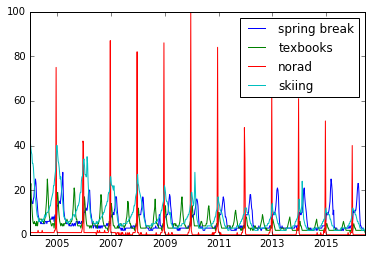

In [4]:
plot(trends.week_start, trends.spring_break, label='spring break')
plot(trends.week_start, trends.textbooks, label='texbooks')
plot(trends.week_start, trends.norad, label='norad')
plot(trends.week_start, trends.skiing, label='skiing')
legend()


#2. Determine in which week of each year (for all five search trends including "global_warming") that search term reached its peak. What trends can you spot with any of the terms?

In [5]:
# create vector of year and month numbers
dates = trends.week_start
yrs = zeros_like(dates)
wks = zeros_like(dates)
for i in range(len(dates)):
    yrs[i] = dates[i].year
    wks[i] = dates[i].isocalendar()[1]

In [30]:
# For each year, list week numbers corresponding to maximum search values
trend = trends.global_warming
for yr in range(2004,2016):
    idx = find(yrs==yr)
    print yr, wks[find(trend[idx] == max(trend[idx]))]

2004 [8]
2005 [38 48 49]
2006 [49 53]
2007 [10]
2008 [16]
2009 [49]
2010 [1]
2011 [5]
2012 [9]
2013 [16]
2014 [1]
2015 [48]


#3. Which term has the largest scatter about its median value? Which term has the smallest scatter? The scatter around the median value can be found using:

$\sigma_{median}^2 = \sum (x_i - {\rm median}(x_i))^2$

In [44]:
# study scatter about median values
def std_median(datums):
    return sqrt( sum( (datums - median(datums))**2 ) )

print "spring break: ",std_median(trends.spring_break)
print "textbooks: ",std_median(trends.textbooks)
print "skiing:",std_median(trends.skiing)
print "norad:",std_median(trends.norad)
print "global warming:",std_median(trends.global_warming)

spring break:  140.378060964
textbooks:  90.0943949422
skiing: 200.98258631
norad: 253.749876847
global warming: 136.91238074


#4. Determine the time lag, in weeks, that maximizes the cross-correlation between "skiing" and "spring break". Try this also for "norad" and "spring break".

<code>numpy</code> has tools for cross-correlations:
<code>
result = np.correlate(trends.spring_break,trends.spring_break,mode='full')
plot(arange(result.size) - result.size/2,result)
</code>

[41]


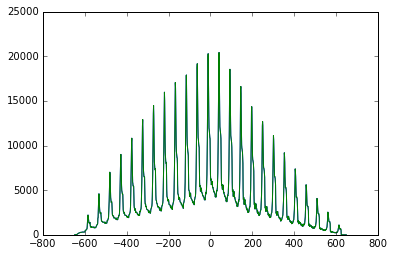

In [16]:
result = np.correlate(trends.norad,trends.spring_break,mode='full')
plot(arange(result.size) - result.size/2,result)
plot(gap,result)
print gap[find(result==max(result))]

[23]


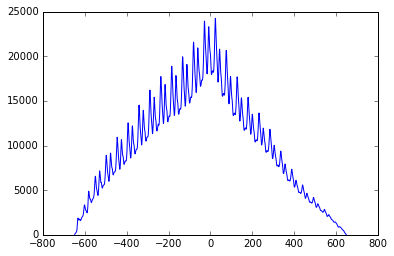

In [20]:
result = np.correlate(trends.textbooks,trends.spring_break, mode='full')
gap = arange(result.size) - result.size/2
plot(gap,result)
print gap[find(result==max(result))]

#5. Download the trend data on two terms of your choosing and redo the questions above. You can obtain the data from:
https://www.google.com/trends/